## Transfer Learning Resnet50 using Tensorflow 

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/Datasets/train'
valid_path = 'Datasets/Datasets/test'


In [3]:
# Import the Resnet50 library as shown below and add preprocessing layer to the front of Resnet
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [4]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [5]:
  # useful for getting number of output classes
folders = glob('Datasets/Datasets/train/*')
folders

['Datasets/Datasets/train\\audi',
 'Datasets/Datasets/train\\lamborghini',
 'Datasets/Datasets/train\\mercedes']

In [6]:
  # useful for getting number of output classes
folders = glob('Datasets/Datasets/test/*')
folders

['Datasets/Datasets/test\\audi',
 'Datasets/Datasets/test\\lamborghini',
 'Datasets/Datasets/test\\mercedes']

In [7]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)
x

<KerasTensor shape=(None, 100352), dtype=float32, sparse=False, name=keras_tensor_175>

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [9]:

# view the structure of the model
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 230, 230, 3)       │               0 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 56, 56, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 23,888,771 (91.13 MB)

 Trainable params: 301,059 (1.15 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [13]:
test_set = test_datagen.flow_from_directory('Datasets/Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [15]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=50
)


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 7s/step - accuracy: 0.3750 - loss: 12.5009 - val_accuracy: 0.1552 - val_loss: 14.6857
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 8s/step - accuracy: 0.3750 - loss: 8.3033 - val_accuracy: 0.1724 - val_loss: 6.4533
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 8s/step - accuracy: 0.4792 - loss: 3.2672 - val_accuracy: 0.5172 - val_loss: 3.1430
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 7s/step - accuracy: 0.3854 - loss: 5.1775 - val_accuracy: 0.5172 - val_loss: 3.9278
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 7s/step - accuracy: 0.4062 - loss: 4.9132 - val_accuracy: 0.3276 - val_loss: 4.0069
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 7s/step - accuracy: 0.4062 - loss: 3.5334 - val_accuracy: 0.2586 - val_loss: 3.1737
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 7s/step - accuracy: 0.4271 - loss: 2.6317 - val_accuracy: 0.1552 - val_loss: 4.2906
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 7s/step - accuracy: 0.4688 - loss: 2.6914 - val_accuracy: 0.5690 - val_loss: 1.8066
Epoch 

In [16]:
r.history

{'accuracy': [0.390625,
  0.359375,
  0.46875,
  0.375,
  0.421875,
  0.390625,
  0.453125,
  0.46875,
  0.5,
  0.515625,
  0.640625,
  0.5625,
  0.59375,
  0.625,
  0.640625,
  0.75,
  0.703125,
  0.765625,
  0.71875,
  0.765625,
  0.734375,
  0.734375,
  0.859375,
  0.796875,
  0.828125,
  0.90625,
  0.875,
  0.90625,
  0.828125,
  0.875,
  0.84375,
  0.90625,
  0.921875,
  0.921875,
  0.875,
  0.890625,
  0.921875,
  0.890625,
  0.96875,
  0.890625,
  0.9375,
  0.921875,
  0.953125,
  0.9375,
  0.9375,
  0.9375,
  0.9375,
  0.9375,
  0.96875,
  0.96875],
 'loss': [12.017343521118164,
  8.553731918334961,
  3.0195424556732178,
  5.645544052124023,
  4.527068138122559,
  3.478557825088501,
  2.6323862075805664,
  2.6516051292419434,
  1.7065372467041016,
  1.8930091857910156,
  1.1669938564300537,
  1.283215045928955,
  1.3540834188461304,
  0.8716690540313721,
  0.8708312511444092,
  0.6548382639884949,
  0.7642974853515625,
  0.5581945180892944,
  0.6298913955688477,
  0.48987036943

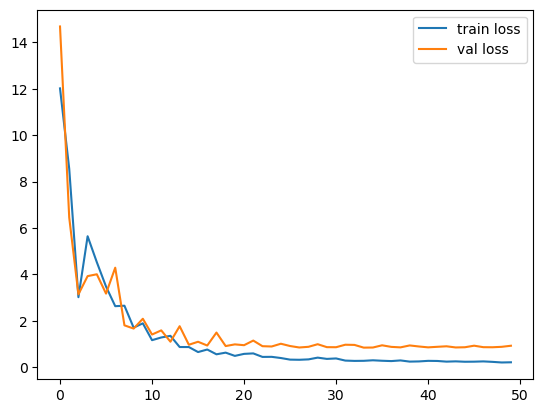

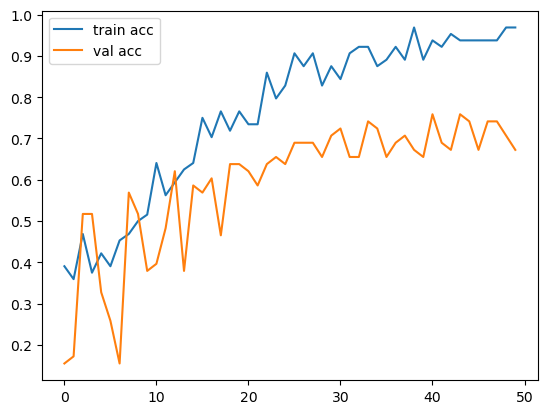

<Figure size 640x480 with 0 Axes>

In [17]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [19]:

y_pred = model.predict(test_set)


2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 4s/step


In [20]:
y_pred

array([[2.23852303e-02, 1.50603883e-03, 9.76108730e-01],
       [9.59304452e-04, 5.98791957e-01, 4.00248706e-01],
       [1.77158937e-02, 7.56832004e-01, 2.25452036e-01],
       [9.70086642e-03, 8.89644384e-01, 1.00654714e-01],
       [6.28653634e-03, 3.58849436e-01, 6.34864092e-01],
       [4.83762026e-02, 5.23943678e-02, 8.99229467e-01],
       [5.80223612e-02, 2.57189721e-01, 6.84787929e-01],
       [8.41275513e-01, 6.14107996e-02, 9.73136798e-02],
       [2.85804446e-04, 9.93563831e-01, 6.15034159e-03],
       [2.84951385e-02, 2.36325532e-01, 7.35179365e-01],
       [2.05840573e-01, 2.47005343e-01, 5.47154129e-01],
       [1.21615075e-01, 3.85363281e-01, 4.93021607e-01],
       [8.51421475e-01, 7.81501681e-02, 7.04284534e-02],
       [3.47856842e-02, 7.26912975e-01, 2.38301277e-01],
       [1.78065840e-02, 5.05138814e-01, 4.77054566e-01],
       [3.55746858e-02, 8.48786533e-01, 1.15638793e-01],
       [3.32122482e-02, 5.89346945e-01, 3.77440751e-01],
       [4.05020118e-02, 3.57432

In [21]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [22]:
y_pred

array([2, 1, 1, 1, 2, 2, 2, 0, 1, 2, 2, 2, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 1, 2, 1, 2, 2, 0, 2, 2, 2, 2, 1, 1, 1, 2, 0, 2, 2, 1,
       1, 0, 1, 1, 1, 1, 0, 2, 1, 2, 2, 1, 1, 1], dtype=int64)

In [23]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [24]:
model=load_model('model_resnet50.h5')

In [26]:
img=image.load_img('31.jpg',target_size=(224,224))



In [27]:
x=image.img_to_array(img)
x

array([[[196., 199., 204.],
        [196., 199., 204.],
        [196., 199., 204.],
        ...,
        [196., 199., 206.],
        [196., 199., 206.],
        [196., 199., 206.]],

       [[196., 199., 204.],
        [196., 199., 204.],
        [196., 199., 204.],
        ...,
        [196., 199., 206.],
        [196., 199., 206.],
        [196., 199., 206.]],

       [[196., 199., 204.],
        [196., 199., 204.],
        [196., 199., 204.],
        ...,
        [196., 199., 206.],
        [196., 199., 206.],
        [196., 199., 206.]],

       ...,

       [[ 37.,  37.,  37.],
        [ 32.,  32.,  32.],
        [ 30.,  30.,  30.],
        ...,
        [ 61.,  61.,  61.],
        [ 61.,  61.,  61.],
        [ 61.,  61.,  61.]],

       [[ 37.,  37.,  37.],
        [ 32.,  32.,  32.],
        [ 30.,  30.,  30.],
        ...,
        [ 61.,  61.,  61.],
        [ 61.,  61.,  61.],
        [ 61.,  61.,  61.]],

       [[ 42.,  42.,  42.],
        [ 36.,  36.,  36.],
        [ 34.,  

In [28]:
x.shape

(224, 224, 3)

In [29]:
x=x/255

In [30]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [31]:
model.predict(img_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[6.1483507e-04, 2.4841545e-04, 9.9913675e-01]], dtype=float32)

In [32]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


In [33]:
a

array([2], dtype=int64)